In [1]:
from sklearn import datasets
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
job = pd.read_csv("/Users/chayavijaya/Desktop/690/final_dataset.csv")
job.head()

,Unnamed: 0,Unnamed: 0.1,title,company,summary,location,salary,Experience,posted_date
0,0,479,IT Project Manager I,Wide Eye,"['produc', 'content', 'checklist', 'client', '...","Washington, DC 20001 (Shaw area)•Remote",92500.0,11,3/18/20
1,1,526,IT Project Manager I,Magview,"['provid', 'direct', 'oversight', 'throughout'...",United States•Remote,57500.0,5,10/22/19
2,2,496,IT Project Manager I,end to end computing,"['requir', 'comprehens', 'understand', 'manag'...","Washington, DC 20202 (Southwest Federal Center...",86410.0,3,3/3/17
3,3,498,IT Project Manager I,JMA Solutions,"['program', 'manag', 'overse', 'aspect', 'proj...","Washington, DC•Temporarily Remote",135000.0,10,1/7/17
4,4,502,IT Project Manager I,"Dfuse Technologies, Inc.","['respons', 'facilit', 'meet', 'review', 'assi...","Arlington, VA 22201 (Ballston-Virginia Square ...",114400.0,9,8/7/17


In [3]:
job = pd.get_dummies(job)
job['salary'] = job['salary'].astype(int)
job.head(5)

,Unnamed: 0,Unnamed: 0.1,salary,Experience,title_CLOUD ENGINEER,title_IT Project Manager I,title_IT Project Manager III,title_SOFTWARE DEVELOPER I,title_SOFTWARE DEVELOPER III,title_Senior Computer Security Systems Specialist,...,posted_date_9/7/18,posted_date_9/7/19,posted_date_9/7/20,posted_date_9/8/17,posted_date_9/8/19,posted_date_9/8/20,posted_date_9/9/17,posted_date_9/9/18,posted_date_9/9/19,posted_date_9/9/20
0,0,479,92500,11,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,526,57500,5,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,496,86410,3,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,498,135000,10,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,502,114400,9,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
X = job.iloc[:, 3:].values 
y = job.iloc[:, 2].values 

In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=109)

In [53]:
X_train= X_train.reshape(-1, 1)
y_train= y_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)
y_test= y_test.reshape(-1, 1)


In [61]:
y = y.reshape(1,-1)

In [49]:
X = np.linspace(0, 2*np.pi, 8)
y = np.sin(X) + np.random.normal(0, 0.4, 8)

In [55]:
X = X.reshape(-1, 1)


In [56]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

In [58]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train, y_train)

/Users/chayavijaya/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVR()

In [73]:
#predicting
y_pred = regressor.predict(X_test)
#y_pred = sc_y.inverse_transform(y_pred) 

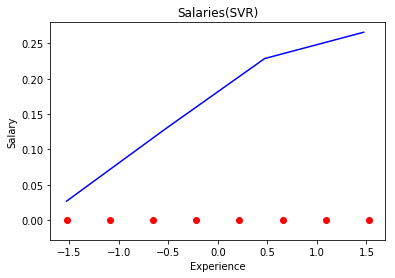

In [77]:
X_grid = np.arange(min(X), max(X)) #this step required because data is feature scaled.
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, regressor.predict(X_grid), color = 'blue')
plt.title('Salaries(SVR)')
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.show()